This notebook will be used for the data science capstone project.

<h1>Capstone Project - Car accident severity

In [124]:
import pandas as pd

In [125]:
import numpy as np

In [126]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<h2>1. Introduction and Business Problem

Car accidents can vary in severity. Emergency services such as the police, fire brigade or paramedics are often called to deal with car accidents.

Knowing the severity of an accident before they arrive can help these emergency services plan ahead to prepare for what vehicles and equipment they need to send and how they might start tackling the problem when they arrive. This in turn can lead to better outcomes from the accident for all involved.

The severity of accidents can depend on a number of factors, many of which can easily be identified from the accident scene by those present.

Our aim is to build a supervised machine learning model that can use the inputs of these factors from an initial call or report of an accident and use it to predict the severity of the acciedent. This can then be used to inform the emergency services before they arrive at the scene.

In this study, we will focus on building a model for the emergency services in the Seattle area of the United States.

<h2>2. Data

Our data set contains accident data recorded in Traffic Records for the city of Seattle as collected by the SDOT and SPD. There are over 194,000 records for accidents from 2004 to present, each with up to 37 different attributes set and an indication of the severity of the accident.

We will use this data set to identify the keep attributes and then to train and test our model in order to predict the severity of an accident.



<h3>2.1 Attributes

Our data contains attributes covering a range of different areas:

* time/date - such the time of the accident (INCDTTM) and the date of the accident (INCDATE)
* location - such as associated intersection (INTKEY), junction type (JUNCTIONTYPE), address type (ADDRTYPE), a description of the location (LOCATION) and crosswalk id (CROSSWALKKEY)
* involement - such as the number of people involved (PERSONCOUNT), the number of pedestrians involved (PEDCOUNT), the number of bicylces involved (PEDCYLCOUNT) and the number of vehciles involved (VEHCOUNT)
* conditions - such as weather (WEATHER), road conditions (ROADCOND), light conditions (LIGHTCOND)
* collision details - such as collision description (COLLISIONTYPE, ST_COLCODE, ST_COLDESC, SDOT_COLCODE, SDOT_COLDESC), lane segment involved (SEGLANEKEY), if speeding was a factor (SPEEDING), if a parked car was involved (HITPARKEDCAR), information on the predestrian right of way (PEDROWNOTGRNT), whether the driver was under the influence or not (UNDERINFL), whether the accident was due to inattention (INATTENTIONIND)
* identification - unique IDs given by various organisations involved in collecting the data, such as OBJECTID, INCKEY, COLDETKEY, REPORTNO and SDOTCOLNUM


<h3>2.2 Identifying the relevant attributes

Not all of these attributes will be relevant for our model. For example, UNDERINFL - attribute identifying whether someone was under the influence of drugs or alcohol, is unlikely to be known about in advance, therefore, we should not include it in our model.  In the same way, information on the predestrian right of way (PEDROWNOTGRNT), knowing if speeding (SPEEDING) or if driver inattention (INATTENTIONIND) were factors may also not be known in advance.

The codes given by the SDOT and SPD are quite detailed. Examples for SDOT_COLDESC include:
* MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE
* DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END

While examples for ST_COLDESC include:
* From opposite direction - one left turn - one straight
* From same direction - both going straight - both moving - rear-end

It is unlikely sufficient information will be obtained from initial call outs to identify the correct code and description here and therefore these should not be used in our model in their current format. However, COLLISIONTYPE appears to give a more usable attribute containing similar data, but in a format which is more likely to be obtainable from the initial report. Examples of COLLISIONTYPE values include:
* Rear Ended
* Angles
* Parked Car


The data contained in the LOCATION attribute can give very specific addresses. This data will be hard to analyse and group in a machine learning model. We will likely be unable to use it unless we can discover a way to split or group it in to a usable format.

The unique IDs will also not form part of our model, but we will pick OBJECTID in order to identify each individual record.

We will therefore attempt to use the following attributes in our model, all of which should normally be easily identifiable or estimated for a collision at the time it is first reporting to the emergency services:
* time of the accident (INCDTTM)
* the date of the accident (INCDATE)
* Iintersection (INTKEY)
* junction type (JUNCTIONTYPE)
* address type (ADDRTYPE)
* crosswalk identifier (CROSSWALKKEY)
* lane segment involved (SEGLANEKEY)
* the number of people involved (PERSONCOUNT)
* the number of pedestrians involved (PEDCOUNT)
* the number of bicylces involved (PEDCYLCOUNT)
* the number of vehciles involved (VEHCOUNT)
* weather (WEATHER)
* road conditions (ROADCOND)
* light conditions (LIGHTCOND)
* collision type (COLLISIONTYPE)
* if a parked car was involved (HITPARKEDCAR)

<h2> 3. Methodology

<h3>3.1 Initial data pre-processing

In [127]:
#Import data from uploaded file
df = pd.read_csv("Data-Collisions-cut-back-attributes.csv")
df.head()

,SEVERITYCODE,SEVERITYDESC,OBJECTID,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Injury Collision,1,Intersection,37475.0,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),Overcast,Wet,Daylight,0,0,N
1,1,Property Damage Only Collision,2,Block,NaN,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0,0,N
2,1,Property Damage Only Collision,3,Block,NaN,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0,0,N
3,1,Property Damage Only Collision,4,Block,NaN,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Clear,Dry,Daylight,0,0,N
4,2,Injury Collision,5,Intersection,34387.0,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),Raining,Wet,Daylight,0,0,N


Note that OBJECTID is not actually needed as we get IDs after important to identify each row - we can drop.

We can also drop SEVERITYCODE, noting that
* SEVERITYCODE = 1 means 'Property damage only collision'
* SEVERITYCODE = 2 means 'Injury collision'

We should also note that INTKEY, CROSSWALKKEY and SEGLANEKEY contain no data / a value of 0 for most records and therefore it is likley best to drop these fields due to the missing data.

Finally, all the information included in INCDATE is duplicated in INCDATTM, so we can drop INCDATE too.

In [128]:
df2 = df.drop(['OBJECTID', 'SEVERITYCODE', 'INCDATE', 'INTKEY', 'CROSSWALKKEY' ,'SEGLANEKEY'], axis = 1)

We can also convert the date column (INCDTTM) to the correct format, while also extracting hour, the day of the week and month from it for new colums.

Finally, we can drop INCDTTM, as it is no longer needed now we have extracted the useful data from it.

In [129]:
df2['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

df2['Hour'] = df2['INCDTTM'].dt.hour
df2['Dayofweek'] = df2['INCDTTM'].dt.dayofweek
df2['Month'] = df2['INCDTTM'].dt.month

In [130]:
df3 = df2.drop(['INCDTTM'], axis = 1)
df3.head()

,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,Hour,Dayofweek,Month
0,Injury Collision,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,14,2,3
1,Property Damage Only Collision,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,18,2,12
2,Property Damage Only Collision,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,10,3,11
3,Property Damage Only Collision,Block,Other,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,9,4,3
4,Injury Collision,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N,8,2,1


<h3>3.2 Investigate specific attributes

<h4> 3.2.1 SEVERITYCODE

First, let's count how many accidents of each severity we have:

In [131]:
df3['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

We have 136,485 of type 1, where the severity is 'Property damage only collision', while 58,188 are type 2 - an 'Injury collision'.

<h4> 3.2.1 ADDRTYPE

In [132]:
df3.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts(normalize=False)

ADDRTYPE      SEVERITYDESC                  
Alley         Property Damage Only Collision      669
              Injury Collision                     82
Block         Property Damage Only Collision    96830
              Injury Collision                  30096
Intersection  Property Damage Only Collision    37251
              Injury Collision                  27819
Name: SEVERITYDESC, dtype: int64

In [133]:
df3.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts(normalize=True)

ADDRTYPE      SEVERITYDESC                  
Alley         Property Damage Only Collision    0.890812
              Injury Collision                  0.109188
Block         Property Damage Only Collision    0.762885
              Injury Collision                  0.237115
Intersection  Property Damage Only Collision    0.572476
              Injury Collision                  0.427524
Name: SEVERITYDESC, dtype: float64

We can see  all three road types have unequal distribution of severity type. All have more type 1 than type 2, but a type 2 collision is more like in Intersections and less likely in Alleys.

We will therefore use one hot encoding to convert this categorical data to binary variables columns.

We can then also drop ADDRTYPE, as all useful data has been extracted.

In [134]:
df4 = pd.concat([df3,pd.get_dummies(df['ADDRTYPE'])], axis=1)
df4 = df4.drop(['ADDRTYPE'], axis = 1)
df4.head()

,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,Hour,Dayofweek,Month,Alley,Block,Intersection
0,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,14,2,3,0,0,1
1,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,18,2,12,0,1,0
2,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,10,3,11,0,1,0
3,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,9,4,3,0,1,0
4,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N,8,2,1,0,0,1


<H4>3.2.2 COLLISIONTYPE

Let's do the same for COLLISIONTYPE.

In [135]:
df4.groupby(['COLLISIONTYPE'])['SEVERITYDESC'].value_counts(normalize=False)

COLLISIONTYPE  SEVERITYDESC                  
Angles         Property Damage Only Collision    21050
               Injury Collision                  13624
Cycles         Injury Collision                   4744
               Property Damage Only Collision      671
Head On        Property Damage Only Collision     1152
               Injury Collision                    872
Left Turn      Property Damage Only Collision     8292
               Injury Collision                   5411
Other          Property Damage Only Collision    17591
               Injury Collision                   6112
Parked Car     Property Damage Only Collision    45325
               Injury Collision                   2662
Pedestrian     Injury Collision                   5936
               Property Damage Only Collision      672
Rear Ended     Property Damage Only Collision    19419
               Injury Collision                  14671
Right Turn     Property Damage Only Collision     2347
               Inju

In [136]:
df4.groupby(['COLLISIONTYPE'])['SEVERITYDESC'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYDESC                  
Angles         Property Damage Only Collision    0.607083
               Injury Collision                  0.392917
Cycles         Injury Collision                  0.876085
               Property Damage Only Collision    0.123915
Head On        Property Damage Only Collision    0.569170
               Injury Collision                  0.430830
Left Turn      Property Damage Only Collision    0.605123
               Injury Collision                  0.394877
Other          Property Damage Only Collision    0.742142
               Injury Collision                  0.257858
Parked Car     Property Damage Only Collision    0.944527
               Injury Collision                  0.055473
Pedestrian     Injury Collision                  0.898305
               Property Damage Only Collision    0.101695
Rear Ended     Property Damage Only Collision    0.569639
               Injury Collision                  0.430361
Right Turn     Property Da

In [137]:
df4 = pd.concat([df4,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
df4 = df4.drop(['COLLISIONTYPE'], axis = 1)
df4.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,Injury Collision,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,...,1,0,0,0,0,0,0,0,0,0
1,Property Damage Only Collision,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,...,0,0,0,0,0,0,0,0,0,1
2,Property Damage Only Collision,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,...,0,0,0,0,0,1,0,0,0,0
3,Property Damage Only Collision,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,...,0,0,0,0,1,0,0,0,0,0
4,Injury Collision,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N,...,1,0,0,0,0,0,0,0,0,0


<h4>3.2.3 WEATHER

Let's do the same for WEATHER:

In [138]:
df4.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=False)

WEATHER                   SEVERITYDESC                  
Blowing Sand/Dirt         Property Damage Only Collision       41
                          Injury Collision                     15
Clear                     Property Damage Only Collision    75295
                          Injury Collision                  35840
Fog/Smog/Smoke            Property Damage Only Collision      382
                          Injury Collision                    187
Other                     Property Damage Only Collision      716
                          Injury Collision                    116
Overcast                  Property Damage Only Collision    18969
                          Injury Collision                   8745
Partly Cloudy             Injury Collision                      3
                          Property Damage Only Collision        2
Raining                   Property Damage Only Collision    21969
                          Injury Collision                  11176
Severe Crosswind   

In [139]:
df4.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)

WEATHER                   SEVERITYDESC                  
Blowing Sand/Dirt         Property Damage Only Collision    0.732143
                          Injury Collision                  0.267857
Clear                     Property Damage Only Collision    0.677509
                          Injury Collision                  0.322491
Fog/Smog/Smoke            Property Damage Only Collision    0.671353
                          Injury Collision                  0.328647
Other                     Property Damage Only Collision    0.860577
                          Injury Collision                  0.139423
Overcast                  Property Damage Only Collision    0.684456
                          Injury Collision                  0.315544
Partly Cloudy             Injury Collision                  0.600000
                          Property Damage Only Collision    0.400000
Raining                   Property Damage Only Collision    0.662815
                          Injury Collision    

In [140]:
df4 = pd.concat([df4,pd.get_dummies(df['WEATHER'])], axis=1)
df4 = df4.drop(['WEATHER'], axis = 1)
df4.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,LIGHTCOND,HITPARKEDCAR,Hour,...,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,Injury Collision,2,0,0,2,At Intersection (intersection related),Wet,Daylight,N,14,...,0,0,0,1,0,0,0,0,0,0
1,Property Damage Only Collision,2,0,0,2,Mid-Block (not related to intersection),Wet,Dark - Street Lights On,N,18,...,0,0,0,0,0,1,0,0,0,0
2,Property Damage Only Collision,4,0,0,3,Mid-Block (not related to intersection),Dry,Daylight,N,10,...,0,0,0,1,0,0,0,0,0,0
3,Property Damage Only Collision,3,0,0,3,Mid-Block (not related to intersection),Dry,Daylight,N,9,...,1,0,0,0,0,0,0,0,0,0
4,Injury Collision,2,0,0,2,At Intersection (intersection related),Wet,Daylight,N,8,...,0,0,0,0,0,1,0,0,0,0


<H4>3.2.4 ROADCOND

Let's also do the same for ROADCOND:

In [141]:
df4.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=False)

ROADCOND        SEVERITYDESC                  
Dry             Property Damage Only Collision    84446
                Injury Collision                  40064
Ice             Property Damage Only Collision      936
                Injury Collision                    273
Oil             Property Damage Only Collision       40
                Injury Collision                     24
Other           Property Damage Only Collision       89
                Injury Collision                     43
Sand/Mud/Dirt   Property Damage Only Collision       52
                Injury Collision                     23
Snow/Slush      Property Damage Only Collision      837
                Injury Collision                    167
Standing Water  Property Damage Only Collision       85
                Injury Collision                     30
Unknown         Property Damage Only Collision    14329
                Injury Collision                    749
Wet             Property Damage Only Collision    31719
 

In [142]:
df4.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)

ROADCOND        SEVERITYDESC                  
Dry             Property Damage Only Collision    0.678227
                Injury Collision                  0.321773
Ice             Property Damage Only Collision    0.774194
                Injury Collision                  0.225806
Oil             Property Damage Only Collision    0.625000
                Injury Collision                  0.375000
Other           Property Damage Only Collision    0.674242
                Injury Collision                  0.325758
Sand/Mud/Dirt   Property Damage Only Collision    0.693333
                Injury Collision                  0.306667
Snow/Slush      Property Damage Only Collision    0.833665
                Injury Collision                  0.166335
Standing Water  Property Damage Only Collision    0.739130
                Injury Collision                  0.260870
Unknown         Property Damage Only Collision    0.950325
                Injury Collision                  0.049675
Wet      

In [143]:
df4 = pd.concat([df4,pd.get_dummies(df['ROADCOND'])], axis=1)
df4 = df4.drop(['ROADCOND'], axis = 1)
df4.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,LIGHTCOND,HITPARKEDCAR,Hour,Dayofweek,...,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,Injury Collision,2,0,0,2,At Intersection (intersection related),Daylight,N,14,2,...,0,0,0,0,0,0,0,0,0,1
1,Property Damage Only Collision,2,0,0,2,Mid-Block (not related to intersection),Dark - Street Lights On,N,18,2,...,0,0,0,0,0,0,0,0,0,1
2,Property Damage Only Collision,4,0,0,3,Mid-Block (not related to intersection),Daylight,N,10,3,...,0,1,0,0,0,0,0,0,0,0
3,Property Damage Only Collision,3,0,0,3,Mid-Block (not related to intersection),Daylight,N,9,4,...,0,1,0,0,0,0,0,0,0,0
4,Injury Collision,2,0,0,2,At Intersection (intersection related),Daylight,N,8,2,...,0,0,0,0,0,0,0,0,0,1


<H4> 3.2.5 LIGHTCOND

Let's do the same for LIGHTCOND

In [144]:
df4.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=False)

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision     1203
                          Injury Collision                    334
Dark - Street Lights Off  Property Damage Only Collision      883
                          Injury Collision                    316
Dark - Street Lights On   Property Damage Only Collision    34032
                          Injury Collision                  14475
Dark - Unknown Lighting   Property Damage Only Collision        7
                          Injury Collision                      4
Dawn                      Property Damage Only Collision     1678
                          Injury Collision                    824
Daylight                  Property Damage Only Collision    77593
                          Injury Collision                  38544
Dusk                      Property Damage Only Collision     3958
                          Injury Collision                   1944
Other              

In [145]:
df4.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision    0.782694
                          Injury Collision                  0.217306
Dark - Street Lights Off  Property Damage Only Collision    0.736447
                          Injury Collision                  0.263553
Dark - Street Lights On   Property Damage Only Collision    0.701589
                          Injury Collision                  0.298411
Dark - Unknown Lighting   Property Damage Only Collision    0.636364
                          Injury Collision                  0.363636
Dawn                      Property Damage Only Collision    0.670663
                          Injury Collision                  0.329337
Daylight                  Property Damage Only Collision    0.668116
                          Injury Collision                  0.331884
Dusk                      Property Damage Only Collision    0.670620
                          Injury Collision    

In [146]:
df4 = pd.concat([df4,pd.get_dummies(df['LIGHTCOND'])], axis=1)
df4 = df4.drop(['LIGHTCOND'], axis = 1)
df4.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,HITPARKEDCAR,Hour,Dayofweek,Month,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,Injury Collision,2,0,0,2,At Intersection (intersection related),N,14,2,3,...,1,0,0,0,0,0,1,0,0,0
1,Property Damage Only Collision,2,0,0,2,Mid-Block (not related to intersection),N,18,2,12,...,1,0,0,1,0,0,0,0,0,0
2,Property Damage Only Collision,4,0,0,3,Mid-Block (not related to intersection),N,10,3,11,...,0,0,0,0,0,0,1,0,0,0
3,Property Damage Only Collision,3,0,0,3,Mid-Block (not related to intersection),N,9,4,3,...,0,0,0,0,0,0,1,0,0,0
4,Injury Collision,2,0,0,2,At Intersection (intersection related),N,8,2,1,...,1,0,0,0,0,0,1,0,0,0


<h4> 3.2.6 JUNCTIONTYPE

In [147]:
df4.groupby(['JUNCTIONTYPE'])['SEVERITYDESC'].value_counts(normalize=False)

JUNCTIONTYPE                                       SEVERITYDESC                  
At Intersection (but not related to intersection)  Property Damage Only Collision     1475
                                                   Injury Collision                    623
At Intersection (intersection related)             Property Damage Only Collision    35636
                                                   Injury Collision                  27174
Driveway Junction                                  Property Damage Only Collision     7437
                                                   Injury Collision                   3234
Mid-Block (but intersection related)               Property Damage Only Collision    15493
                                                   Injury Collision                   7297
Mid-Block (not related to intersection)            Property Damage Only Collision    70396
                                                   Injury Collision                  19404
Ramp Jun

In [148]:
df4.groupby(['JUNCTIONTYPE'])['SEVERITYDESC'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYDESC                  
At Intersection (but not related to intersection)  Property Damage Only Collision    0.703051
                                                   Injury Collision                  0.296949
At Intersection (intersection related)             Property Damage Only Collision    0.567362
                                                   Injury Collision                  0.432638
Driveway Junction                                  Property Damage Only Collision    0.696936
                                                   Injury Collision                  0.303064
Mid-Block (but intersection related)               Property Damage Only Collision    0.679816
                                                   Injury Collision                  0.320184
Mid-Block (not related to intersection)            Property Damage Only Collision    0.783920
                                                   Injury Collision     

In [149]:
df4 = pd.concat([df4,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
df4 = df4.drop(['JUNCTIONTYPE'], axis = 1)
df4.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,Hour,Dayofweek,Month,Alley,...,Dusk,Other,Unknown,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown
0,Injury Collision,2,0,0,2,N,14,2,3,0,...,0,0,0,0,1,0,0,0,0,0
1,Property Damage Only Collision,2,0,0,2,N,18,2,12,0,...,0,0,0,0,0,0,0,1,0,0
2,Property Damage Only Collision,4,0,0,3,N,10,3,11,0,...,0,0,0,0,0,0,0,1,0,0
3,Property Damage Only Collision,3,0,0,3,N,9,4,3,0,...,0,0,0,0,0,0,0,1,0,0
4,Injury Collision,2,0,0,2,N,8,2,1,0,...,0,0,0,0,1,0,0,0,0,0


<h4>3.2.7 HITPARKEDCAR

Finally, we convert our last non-numeric field, HITPARKEDCAR:

In [150]:
df4.groupby(['HITPARKEDCAR'])['SEVERITYDESC'].value_counts(normalize=False)

HITPARKEDCAR  SEVERITYDESC                  
N             Property Damage Only Collision    129717
              Injury Collision                   57740
Y             Property Damage Only Collision      6768
              Injury Collision                     448
Name: SEVERITYDESC, dtype: int64

We will replace N with 0 and Y with 1.

In [151]:
replace_map = {'HITPARKEDCAR': {'N': 0, 'Y': 1}}

df4.replace(replace_map, inplace=True)


In [152]:
df4.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,Hour,Dayofweek,Month,Alley,...,Dusk,Other,Unknown,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown
0,Injury Collision,2,0,0,2,0,14,2,3,0,...,0,0,0,0,1,0,0,0,0,0
1,Property Damage Only Collision,2,0,0,2,0,18,2,12,0,...,0,0,0,0,0,0,0,1,0,0
2,Property Damage Only Collision,4,0,0,3,0,10,3,11,0,...,0,0,0,0,0,0,0,1,0,0
3,Property Damage Only Collision,3,0,0,3,0,9,4,3,0,...,0,0,0,0,0,0,0,1,0,0
4,Injury Collision,2,0,0,2,0,8,2,1,0,...,0,0,0,0,1,0,0,0,0,0


<h3>3.3 Reducing features
    
Our data still has a huge number of features. Let's look for correlation betwen them to see if we can reduce the number.

In [153]:
import matplotlib.pyplot as plt

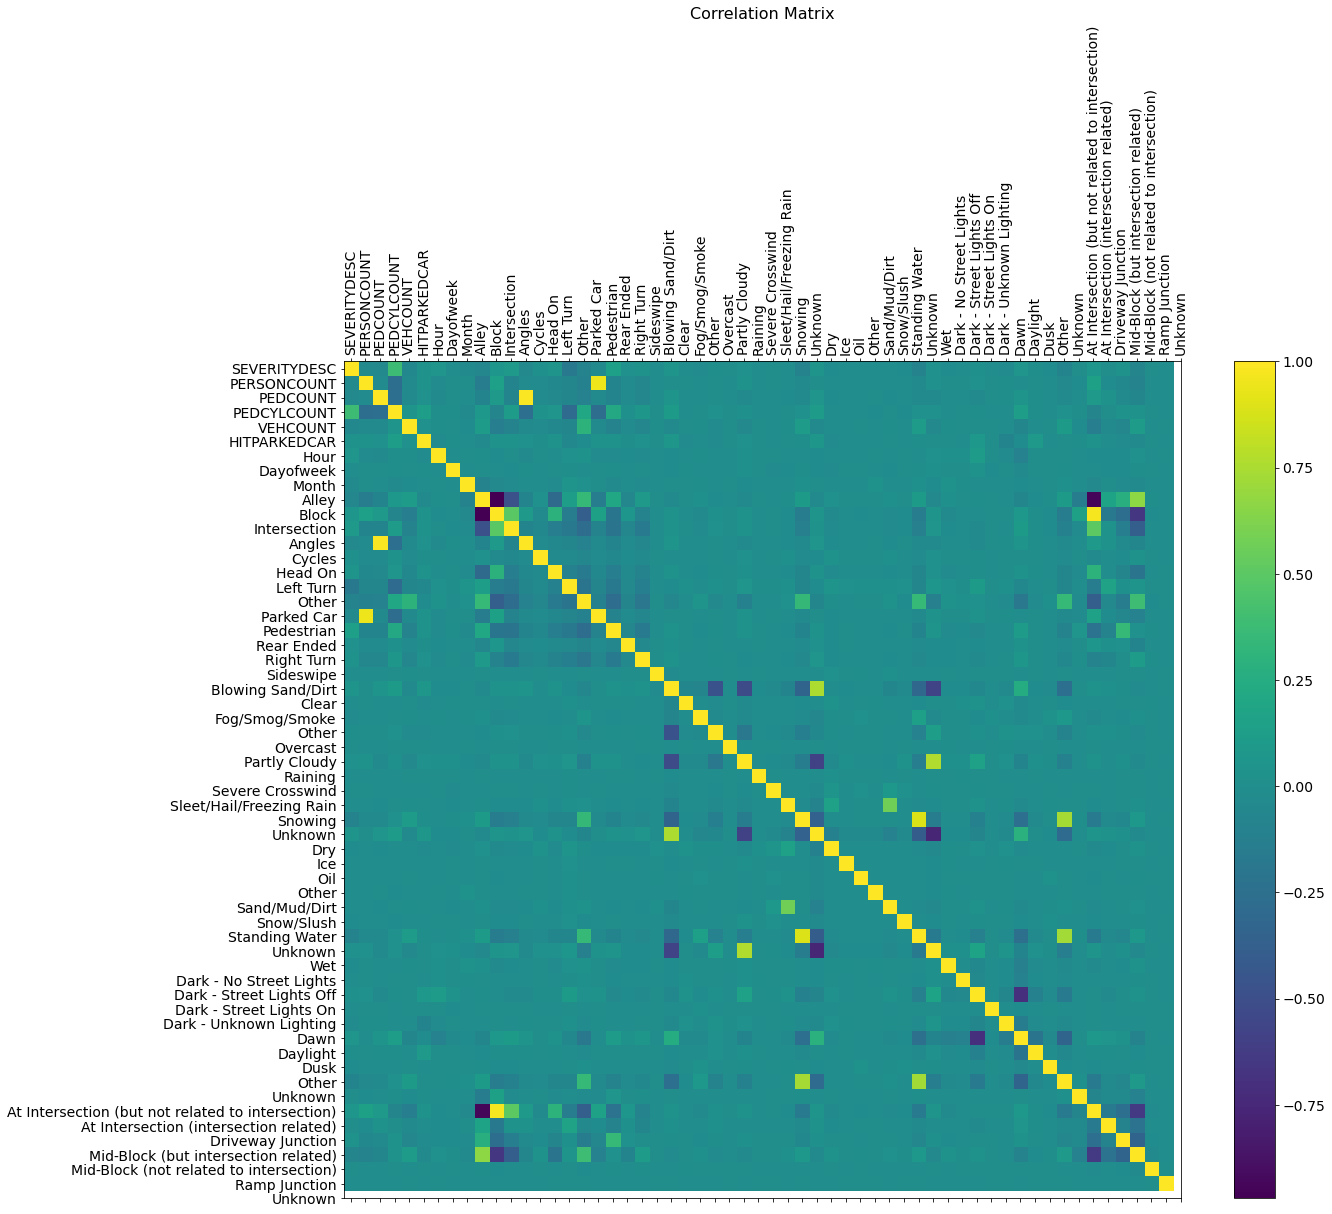

In [154]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df4.corr(), fignum=f.number)
plt.xticks(range(df4.shape[1]), df4.columns, fontsize=14, rotation=90)
plt.yticks(range(df4.shape[1]), df4.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

The following are all highly correlated:

Angles,PEDCOUNT

Parked car, PERSONCOUNT

Block, Alley

At intersection (but not related to intersection), Alley

At intersection (but not related to intersection), Block

Mid-Block (but intersection related), At intersection (but not related to intersection)

Unknwon (weather), Unknown (road conditions)

Blowing sand /dirt, Unknown (weather)

Blowing sand /dirt, Unknown (road conditions)

Unknwon (weather), Partially cloudy

Unknwon (road conditions), Partially cloudy

Snowing, Standing water

Sleet/hail/freezing rain, Sand/mud/dirt

Other (time of day), Standing water

Dawn, dark (street lights off)


We will therefore attempt to eliminate as many of these factors as possible.

We will eliminate

Alley

Angles

Parked car

Mid-Block (but intersection related)

Unknwon (weather)

Unknown (road conditions)

Sand/mud/dirt

Standing water

dark (street lights off)

In [155]:
df5 = df4.drop(['Alley', 'Angles', 'Parked Car', 'Mid-Block (but intersection related)', 'Sand/Mud/Dirt', 'Standing Water', 'Dark - Street Lights Off', 'Unknown'], axis = 1)

In [156]:
df5.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,Hour,Dayofweek,Month,Block,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (not related to intersection),Ramp Junction
0,Injury Collision,2,0,0,2,0,14,2,3,0,...,0,0,1,0,0,0,1,0,0,0
1,Property Damage Only Collision,2,0,0,2,0,18,2,12,1,...,0,0,0,0,0,0,0,0,1,0
2,Property Damage Only Collision,4,0,0,3,0,10,3,11,1,...,0,0,1,0,0,0,0,0,1,0
3,Property Damage Only Collision,3,0,0,3,0,9,4,3,1,...,0,0,1,0,0,0,0,0,1,0
4,Injury Collision,2,0,0,2,0,8,2,1,0,...,0,0,1,0,0,0,1,0,0,0


<H3> 3.4 Feature selection

We how have our data all coverted to numerical values. It consists of 58 column. Next let define our feature set and call it X, which consists of all our data, excluding the SEVERITYCODE colum.

In [157]:
X = df5.drop(['SEVERITYDESC'], axis = 1)

In [158]:
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,Hour,Dayofweek,Month,Block,Intersection,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (not related to intersection),Ramp Junction
0,2,0,0,2,0,14,2,3,0,1,...,0,0,1,0,0,0,1,0,0,0
1,2,0,0,2,0,18,2,12,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,0,0,3,0,10,3,11,1,0,...,0,0,1,0,0,0,0,0,1,0
3,3,0,0,3,0,9,4,3,1,0,...,0,0,1,0,0,0,0,0,1,0
4,2,0,0,2,0,8,2,1,0,1,...,0,0,1,0,0,0,1,0,0,0


Next, we set y:

In [159]:
y = df5['SEVERITYDESC']

In [160]:
y[0:5]

0                  Injury Collision
1    Property Damage Only Collision
2    Property Damage Only Collision
3    Property Damage Only Collision
4                  Injury Collision
Name: SEVERITYDESC, dtype: object

Next, we will split out data in to training and testing sets. We will use the same sets for each machine learning method.

In [161]:
print('Size of X:', X.shape)
print('Size of y:', y.shape)

Size of X: (194673, 46)
Size of y: (194673,)


In [162]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 46) (155738,)
Test set: (38935, 46) (38935,)


All looks good  with our sizes.

Finally, we will seek to normalise our data tests for use in creating the models.

In [164]:
X_train_n = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train_n[0:5]

array([[-3.33e-01, -1.87e-01, -1.69e-01,  1.24e-01, -1.97e-01,  5.42e-01,
        -1.53e+00, -1.33e+00,  7.30e-01, -7.08e-01, -1.69e-01, -1.03e-01,
        -2.75e-01, -3.72e-01, -1.87e-01, -4.62e-01, -1.24e-01,  3.08e+00,
        -1.68e-02,  8.66e-01, -5.36e-02, -6.49e-02, -4.07e-01, -5.07e-03,
        -4.53e-01, -1.16e-02, -2.42e-02, -6.78e-02,  7.51e-01, -7.89e-02,
        -1.77e-02, -2.52e-02, -7.07e-02, -5.68e-01, -9.06e-02, -5.75e-01,
        -6.21e-03, -1.13e-01,  8.21e-01, -1.76e-01, -3.47e-02, -1.04e-01,
        -6.89e-01, -2.41e-01, -9.25e-01, -3.07e-02],
       [ 4.10e-01, -1.87e-01, -1.69e-01,  1.24e-01, -1.97e-01,  6.83e-01,
        -4.88e-01, -1.61e-01,  7.30e-01, -7.08e-01, -1.69e-01, -1.03e-01,
        -2.75e-01, -3.72e-01, -1.87e-01, -4.62e-01, -1.24e-01, -3.25e-01,
        -1.68e-02, -1.15e+00, -5.36e-02, -6.49e-02,  2.46e+00, -5.07e-03,
        -4.53e-01, -1.16e-02, -2.42e-02, -6.78e-02,  7.51e-01, -7.89e-02,
        -1.77e-02, -2.52e-02, -7.07e-02, -5.68e-01, -9.06e-

In [165]:
X_test_n = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test_n[0:5]

array([[ 4.22e-01, -1.87e-01, -1.71e-01,  1.32e-01, -1.94e-01,  2.58e-01,
         1.07e+00,  1.59e+00,  7.34e-01, -7.12e-01, -1.70e-01, -1.02e-01,
        -2.75e-01, -3.74e-01, -1.88e-01, -4.57e-01, -1.26e-01,  3.08e+00,
        -1.76e-02, -1.15e+00, -5.63e-02, -6.80e-02, -4.11e-01, -5.07e-03,
         2.20e+00, -1.01e-02, -2.38e-02, -7.08e-02, -1.33e+00, -7.96e-02,
        -1.96e-02, -2.91e-02, -7.71e-02,  1.76e+00, -8.33e-02, -5.80e-01,
        -1.13e-02, -1.17e-01,  8.29e-01, -1.80e-01, -3.51e-02, -1.05e-01,
        -6.93e-01, -2.38e-01,  1.08e+00, -2.21e-02],
       [-3.20e-01, -1.87e-01, -1.71e-01,  1.32e-01, -1.94e-01, -5.91e-01,
        -1.01e+00,  1.59e+00, -1.36e+00,  1.41e+00, -1.70e-01, -1.02e-01,
         3.63e+00, -3.74e-01, -1.88e-01, -4.57e-01, -1.26e-01, -3.25e-01,
        -1.76e-02, -1.15e+00, -5.63e-02, -6.80e-02,  2.43e+00, -5.07e-03,
        -4.54e-01, -1.01e-02, -2.38e-02, -7.08e-02, -1.33e+00, -7.96e-02,
        -1.96e-02, -2.91e-02, -7.71e-02,  1.76e+00, -8.33e-

<h3>3.4 K Nearest Neighbour model

We will see to find the best value for k. To do this, we will go back to our un-normalised X_train data set and further split for trialling this, before going back to use X_train_n to once we have identified the best k in order to train the final model.

In [166]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
print ('Train set:', X_train_knn.shape,  y_train_knn.shape)
print ('Test set:', X_test_knn.shape,  y_test_knn.shape)

Train set: (124590, 46) (124590,)
Test set: (31148, 46) (31148,)


Next, let's normalise our data:

In [167]:
X_train_knn_n = preprocessing.StandardScaler().fit(X_train_knn).transform(X_train_knn)
X_train_knn_n[0:5]

array([[-0.33, -0.19, -0.17,  0.12, -0.2 , -0.31, -1.01,  1.01, -1.37,
         1.42, -0.17, -0.1 , -0.27, -0.37, -0.19, -0.46, -0.12, -0.32,
        -0.02,  0.87, -0.05, -0.07, -0.41, -0.01, -0.45, -0.01, -0.02,
        -0.07,  0.75, -0.08, -0.02, -0.02, -0.07, -0.57, -0.09, -0.57,
        -0.01, -0.11,  0.82, -0.18, -0.03, -0.1 ,  1.45, -0.24, -0.92,
        -0.03],
       [-0.33, -0.19, -0.17,  0.12, -0.2 ,  0.26, -1.01,  1.3 ,  0.73,
        -0.71, -0.17, -0.1 , -0.27, -0.37, -0.19,  2.16, -0.12, -0.32,
        -0.02,  0.87, -0.05, -0.07, -0.41, -0.01, -0.45, -0.01, -0.02,
        -0.07,  0.75, -0.08, -0.02, -0.02, -0.07, -0.57, -0.09, -0.57,
        -0.01, -0.11,  0.82, -0.18, -0.03, -0.1 , -0.69, -0.24, -0.92,
        -0.03],
       [-0.33, -0.19, -0.17,  0.12, -0.2 ,  1.25, -1.53,  1.3 ,  0.73,
        -0.71, -0.17, -0.1 , -0.27, -0.37, -0.19, -0.46, -0.12, -0.32,
        -0.02, -1.15, -0.05, -0.07, -0.41, -0.01,  2.22, -0.01, -0.02,
        -0.07, -1.33, -0.08, -0.02, -0.02, -0

In [168]:
X_test_knn_n = preprocessing.StandardScaler().fit(X_test_knn).transform(X_test_knn)
X_test_knn_n[0:5]

array([[-0.32, -0.19, -0.17,  0.12, -0.2 ,  1.25,  1.08, -1.33,  0.73,
        -0.71, -0.17, -0.1 , -0.28, -0.37, -0.19, -0.46, -0.13, -0.33,
        -0.02,  0.87, -0.05, -0.06, -0.4 ,  0.  , -0.46, -0.01, -0.03,
        -0.07,  0.75, -0.07, -0.01, -0.03, -0.07, -0.57, -0.09, -0.58,
         0.  , -0.11, -1.22, -0.17, -0.04, -0.1 , -0.69, -0.24,  1.08,
        -0.03],
       [ 0.41,  4.89, -0.17, -1.45, -0.2 ,  0.97,  0.04,  1.3 , -1.36,
         1.4 , -0.17, -0.1 , -0.28, -0.37,  5.32, -0.46, -0.13, -0.33,
        -0.02,  0.87, -0.05, -0.06, -0.4 ,  0.  , -0.46, -0.01, -0.03,
        -0.07,  0.75, -0.07, -0.01, -0.03, -0.07, -0.57, -0.09,  1.72,
         0.  , -0.11, -1.22, -0.17, -0.04, -0.1 ,  1.44, -0.24, -0.93,
        -0.03],
       [ 0.41, -0.19, -0.17,  0.12, -0.2 ,  0.4 , -0.49,  1.01,  0.73,
        -0.71, -0.17, -0.1 , -0.28, -0.37, -0.19,  2.19, -0.13, -0.33,
        -0.02,  0.87, -0.05, -0.06, -0.4 ,  0.  , -0.46, -0.01, -0.03,
        -0.07,  0.75, -0.07, -0.01, -0.03, -0

Let's try the knn algorithm for a number of different k and the plot the results.from sklearn.neighbors import KNeighborsClassifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
Ks = 11
mean_acc = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(3,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn_n,y_train_knn)
    yhat_knn=neigh.predict(X_test_knn_n)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn, yhat_knn)

    
#    std_acc[n-1]=np.std(yhat_knn==y_test_knn)/np.sqrt(yhat_knn.shape[0])

mean_acc

In [170]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

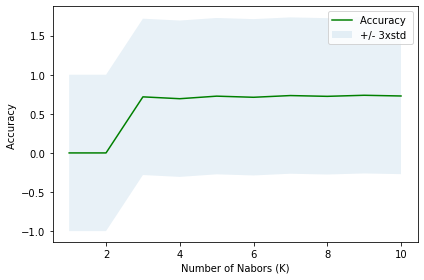

In [58]:
plt.plot(range(1,Ks),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 1,mean_acc + 1, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [59]:
print( "The best accuracy for knn was with", mean_acc.max(), "with k=", mean_acc.argmax()+1, ". We will therefore use k=", mean_acc.argmax()+1, " in our core knn model with sets X_test_n and y_test") 

The best accuracy for knn was with 0.7374791318864775 with k= 9 . We will therefore use k= 9  in our core knn model with sets X_test_n and y_test


It is possible a higher value for k would yield a better accuracy score. However the computation time would be far too great to continue with higher k, and we also risk over fitting the model to the test data. We can also see that for all small values of k, the accuracy is reasonably similar.

We will now run the knn algorithm for k = 9 with the full training data set.

In [96]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_n,y_train)
yhat_knn = neigh.predict(X_test_n)
yhat_knn[0:5]
print("Train_knn set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_n)))
print("Test_knn set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train_knn set Accuracy:  0.7857234586292363
Test_knn set Accuracy:  0.7364838833954026


In [171]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [98]:
print("Avg F1-score (7nn): %.4f" % f1_score(y_test, yhat_knn, average='weighted'))
print("Jaccard score (7nn): %.4f" % jaccard_score(y_test, yhat_knn)) 

Avg F1-score (7nn): 0.7190
Jaccard score (7nn): 0.7365


<h4>3.5 Decision Trees

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

We will first try a few sample depths for the decision tree, to see what the accuracy is like:

In [173]:
severity = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
severity.fit(X_train_n,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [174]:
predTree = severity.predict(X_test_n)

In [175]:
print (predTree [0:10])
print (y_test [0:10])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Injury Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision']
181980                  Injury Collision
163332    Property Damage Only Collision
180525    Property Damage Only Collision
1695                    Injury Collision
143631                  Injury Collision
63499     Property Damage Only Collision
65001                   Injury Collision
159841                  Injury Collision
174858                  Injury Collision
25548     Property Damage Only Collision
Name: SEVERITYDESC, dtype: object
DecisionTrees's Accuracy:  0.7532554257095159


In [177]:
print("Avg F1-score (dt6): %.4f" % f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score (dt6): %.4f" % jaccard_score(y_test, predTree)) 

Avg F1-score (dt6): 0.6910


In [179]:
d = 3

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 3 : 0.7532554257095159
Avg F1-score when d = 3 : 0.6909988902630863


In [181]:
d = 4

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 4 : 0.7532040580454604
Avg F1-score when d = 4 : 0.6909088263165114


In [182]:
d = 5

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 5 : 0.7553101322717349
Avg F1-score when d = 5 : 0.7257176472247898


In [183]:
d = 6

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 6 : 0.7575189418261205
Avg F1-score when d = 6 : 0.7106348787888592


In [184]:
d = 7

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 7 : 0.7582637729549249
Avg F1-score when d = 7 : 0.7131808499657409


In [185]:
d = 8

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 8 : 0.759727751380506
Avg F1-score when d = 8 : 0.7201291842237023


In [186]:
d = 9

severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
print("DecisionTrees's Accuracy when d =", d, ":",  metrics.accuracy_score(y_test, predTree))
print("Avg F1-score when d =", d, ":" , f1_score(y_test, predTree, average='weighted'))
#print("Jaccard score when d =", d, ":" , jaccard_score(y_test, predTree)) 

DecisionTrees's Accuracy when d = 9 : 0.7585976627712855
Avg F1-score when d = 9 : 0.7243390767720724


Let's write a recurring formula to test a wide range of d in the range 2 to 50.

In [188]:
d = 50
mean_acc = np.zeros((d-1))
f1s = np.zeros((d-1))
jac = np.zeros((d-1))
ConfustionMx = [];
for n in range(2,d):
    
 
    severity = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    severity.fit(X_train_n,y_train)
    predTree = severity.predict(X_test_n)

    mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)
    f1s[n-1] = f1_score(y_test, predTree, average='weighted')    
#    jac[n-1] = jaccard_score(y_test, predTree)
    

print("DecisionTrees's Accuracy: ", mean_acc)
print( "The best accuracy for decision tree was with", mean_acc.max(), "with d=", mean_acc.argmax()+1)

print("DecisionTrees's F1 scoreS: ", f1s)
print( "The best F1 score for decision tree was with",f1s.max(), "with d=", f1s.argmax()+1)

#print("DecisionTrees's Jaccard scores: ", jac)
#print( "The best Jaccard score for decision tree was with",jac.max(), "with d=", jac.argmax()+1)


DecisionTrees's Accuracy:  [0.   0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.68 0.68 0.68 0.68 0.68 0.68 0.68]
The best accuracy for decision tree was with 0.6785668421728522 with d= 37
DecisionTrees's F1 scoreS:  [0.   0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.68 0.68 0.68 0.68 0.68 0.68 0.68]
The best F1 score for decision tree was with 0.681805146101905 with d= 37


In [189]:
severity = DecisionTreeClassifier(criterion="entropy", max_depth = 37)
severity.fit(X_train_n,y_train)
predTree = severity.predict(X_test_n)
    
    
mean_acc = metrics.accuracy_score(y_test, predTree)
f1s = f1_score(y_test, predTree, average='weighted')    
#jac = jaccard_score(y_test, predTree)



print("DecisionTrees's Accuracy: ", mean_acc)
print("DecisionTrees's F1 score: ", f1s)
#print("DecisionTrees's Jaccard Score: ", jac)

DecisionTrees's Accuracy:  0.6781045331963529
DecisionTrees's F1 score:  0.6811032208372303


In [190]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [191]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                                precision    recall  f1-score   support

              Injury Collision       0.46      0.49      0.47     11510
Property Damage Only Collision       0.78      0.76      0.77     27425

                      accuracy                           0.68     38935
                     macro avg       0.62      0.62      0.62     38935
                  weighted avg       0.68      0.68      0.68     38935

Confusion matrix, without normalization
[[20762  6663]
 [ 5870  5640]]


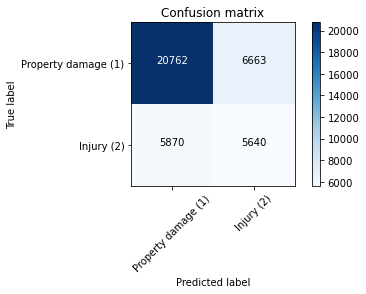

In [192]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=['Property Damage Only Collision','Injury Collision'])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property damage (1)','Injury (2)'],normalize= False,  title='Confusion matrix')


In [201]:
print("Predict 'property damage' correctly: ", 100*(20762/(20762+6663)), "%")
print("Predict 'property damage' when it's an 'injury collision': ", 100*(5870/(5870+5640)), "%")
print("Predict 'injury' correctly: ", 100*(5640/(5870+5640)), "%")
print("Predict 'injury' when it's 'property damage': ", 100*(6663/(20762+6663)), "%")

Predict 'property damage' correctly:  75.70464904284412 %
Predict 'property damage' when it's an 'injury collision':  50.99913119026933 %
Predict 'injury' correctly:  49.00086880973067 %
Predict 'injury' when it's 'property damage':  24.29535095715588 %


This suggests our model will predict correctly a property damage collision more than three quarters of the time, but will fail to predict an 'injury collision' a around half of the time.

<h4> 3.6 Logistic regression

In [193]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [194]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [195]:
yhat_lr = LR.predict(X_test_n)

In [197]:
print("Avg F1-score (lr): %.4f" % f1_score(y_test, yhat_lr, average='weighted'))
#print("Jaccard score (lr): %.4f" % jaccard_score(y_test, yhat_lr))  

Avg F1-score (lr): 0.7003


In [198]:
yhat_lr_prob = LR.predict_proba(X_test_n)
yhat_lr_prob

array([[2.55e-03, 9.97e-01],
       [2.33e-01, 7.67e-01],
       [1.89e-04, 1.00e+00],
       ...,
       [1.04e-01, 8.96e-01],
       [1.13e-02, 9.89e-01],
       [2.34e-01, 7.66e-01]])

In [199]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_lr_prob)

0.8054981756391366

                                precision    recall  f1-score   support

              Injury Collision       0.74      0.24      0.36     11510
Property Damage Only Collision       0.75      0.97      0.84     27425

                      accuracy                           0.75     38935
                     macro avg       0.74      0.60      0.60     38935
                  weighted avg       0.75      0.75      0.70     38935

Confusion matrix, without normalization
[[26470   955]
 [ 8802  2708]]


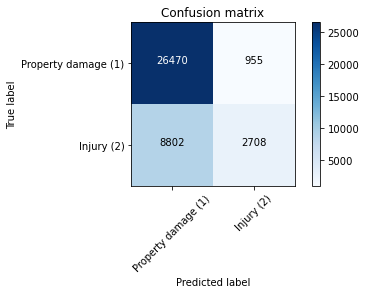

In [200]:
# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_test, yhat_lr, labels=['Property Damage Only Collision','Injury Collision'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['Property damage (1)','Injury (2)'],normalize= False,  title='Confusion matrix')

In [105]:
print("Predict 'property damage' correctly: ", 100*(26470/(26470+955)), "%")
print("Predict 'property damage' when it's an 'injury collision': ", 100*(8802/(8802+2708)), "%")
print("Predict 'injury' correctly: ", 100*(2708/(8802+2708)), "%")
print("Predict 'injury' when it's 'property damage': ", 100*(955/(26470+955)), "%")

Predict 'property damage' correctly:  96.51777575205105 %
Predict 'property damage' when it's an 'injury collision':  76.47263249348393 %
Predict 'injury' correctly:  23.52736750651607 %
Predict 'injury' when it's 'property damage':  3.4822242479489516 %


We can see that logistic regression is more accurate than decision trees. However, we can also see that predicting the likelihood of a collision with injury is significantly less accurate than predicting a collision will only have property damage. This is likely due to significantly more data points in our data set being for proterty damage collisions than injury collisions. We will therefore consider under- or over-sampling to recitfy this in our models.